# Chessboard

On this notebook tutorial we present a example to create phenomenal.Chessboard Object.

## 1. Prerequisites

### 1.1 Download data Set 


Download the chessboard image dataset [here](https://gforge.inria.fr/frs/download.php/file/35019/CHESSBOARD_PhenoArch_2013_sv_face1.zip) and extract it.

Indicate the path in **data_path_directory** variable below. 

In [1]:
path_directory = './CHESSBOARD_PhenoArch_2013_sv_face1/'

### 1.2 Load path file

In [2]:
import glob

# Load path files from directory
filenames = glob.glob(path_directory + '*.png')

# Extract angles from path files
angles = map(lambda x: int((x.split('_sv')[-1]).split('.png')[0]), filenames)

image_paths = dict()
for i in range(len(filenames)):
    image_paths[angles[i]] = filenames[i]

### 1.3 Display a image

<IPython.core.display.Javascript object>


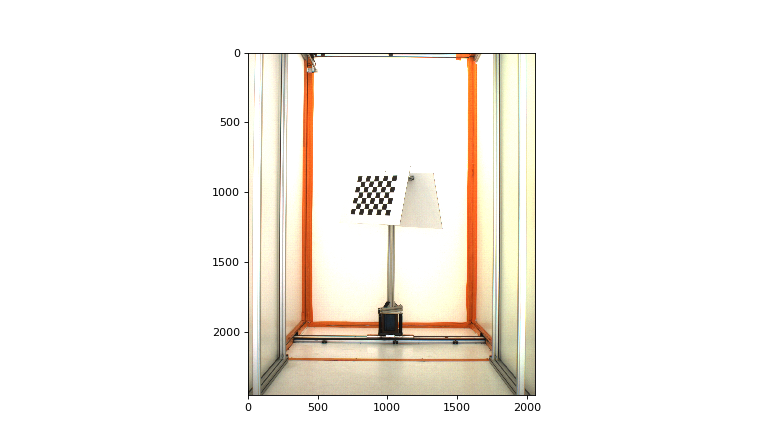

In [6]:
%matplotlib notebook

from openalea.phenomenal.display import show_image
from openalea.phenomenal.image import read_image


angle = 90
image = read_image(image_paths[angle])
show_image(image)

## 2. Chessboard object

### 2.1 Create

Create chessboard object with square size and shape of chessboard

In [7]:
from openalea.phenomenal.calibration.chessboard import Chessboard

square_size_of_chessboard = 47 # In mm
square_shape_of_chessboard = (8, 6) # (8 square x 6 square on chessboard)

# BUILD CHESSBOARD OBJECT
chessboard = Chessboard(square_size_of_chessboard, 
                        square_shape_of_chessboard)

# DISPLAY IT
print chessboard

Chessboard Attributes :
Square size (mm): 47
Shape : (8, 6)
Number of angle : 0



### 2.2 Find corners

In [8]:
from cv2 import imread, IMREAD_GRAYSCALE, imwrite

id_camera = "side"

# LOAD IMAGE AND FIND CHESSBOARD CORNERS IN EACH IMAGE
for angle in image_paths:
    # LOAD IMAGE WITH OPENCV
    img = imread(image_paths[angle], IMREAD_GRAYSCALE)
    # CALL CHESSBOARD FUNCTION FOR FIND CORNERS
    found = chessboard.detect_corners(id_camera, angle, img)
    print("Angle {} - Chessboard corners {}".format(angle, 
                                                    "found" if found else "not found"))

Angle 0 - Chessboard corners found
Angle 129 - Chessboard corners not found
Angle 3 - Chessboard corners found
Angle 132 - Chessboard corners not found
Angle 6 - Chessboard corners found
Angle 135 - Chessboard corners not found
Angle 9 - Chessboard corners found
Angle 138 - Chessboard corners not found
Angle 12 - Chessboard corners found
Angle 15 - Chessboard corners found
Angle 18 - Chessboard corners found
Angle 21 - Chessboard corners found
Angle 24 - Chessboard corners found
Angle 27 - Chessboard corners found
Angle 30 - Chessboard corners found
Angle 33 - Chessboard corners found
Angle 36 - Chessboard corners found
Angle 39 - Chessboard corners found
Angle 42 - Chessboard corners found
Angle 45 - Chessboard corners found
Angle 48 - Chessboard corners found
Angle 51 - Chessboard corners found
Angle 54 - Chessboard corners found
Angle 57 - Chessboard corners found
Angle 60 - Chessboard corners found
Angle 63 - Chessboard corners found
Angle 66 - Chessboard corners found
Angle 324 - 

### 2.3 Display it

<IPython.core.display.Javascript object>


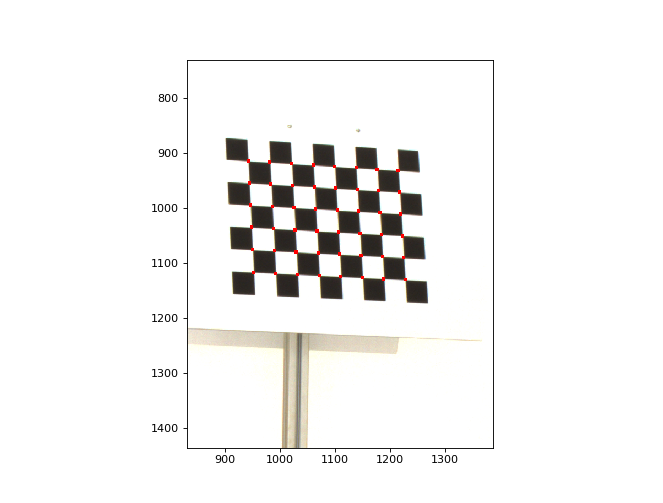

In [12]:
angle = 30
img = imread(image_paths[angle], IMREAD_COLOR)

if angle in chessboard.image_points[id_camera]:  
    
    # DRAW RED POINT ON IMAGE CORNERS POSITION
    points_2d = chessboard.image_points[id_camera][angle].astype(int)
    k_neighbors = 3
    for x, y in zip(points_2d[:, 0, 1], points_2d[:, 0, 0]):
        img[x-k_neighbors:x+k_neighbors, y-k_neighbors:y+k_neighbors] = [0, 0, 255]

show_image(img)

### 2.4 Dump & load

In [16]:
chessboard.dump('chessboard')
chessboard = Chessboard.load('chessboard')